In [1]:
!pip install pandas>=1.1.4

In [2]:
!cd yolov5 & pip install -r requirements.txt

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pmdarima 1.8.2 requires numpy~=1.19.0, but you'll have numpy 1.21.4 which is incompatible.


  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


In [3]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html


Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device



In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in C:\Users\Louiz/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-6 torch 1.9.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [35]:
!cd yolov5 && python train.py --img 416 --batch 16 --epochs 500 --data data.yaml --weights yolov5s.pt --workers 2


github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from runs\train\exp12\weights\last.pt, 14.3MB
Optimizer stripped from runs\train\exp12\weights\best.pt, 14.3MB


train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-12-3 torch 1.9.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Sta

    10/499        0G   0.04199   0.02643   0.01838        11       416: 100%|##########| 6/6 [01:01<00:00, 10.20s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/1 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:08<00:00,  8.15s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:08<00:00,  8.16s/it]
                 all         24         24      0.285      0.281      0.226     0.0701

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/6 [00:00<?, ?it/s]
    11/499        0G   0.04266   0.02735   0.01824        51       416:   0%|          | 0/6 [00:11<?, ?it/s]
    11/499        0G   0.04266   0.02735   0.01824        51       416:  17%|#6        | 1/6 [00:11<00:59, 11.80s/it]
    11/499        0G   0.04288   0.02674   0.01803        49 

In [3]:
# bad dataset and gave bad results
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Louiz/.cache\torch\hub\master.zip
YOLOv5  2021-12-6 torch 1.9.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [2]:
# better an large dataset gave good results
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Louiz/.cache\torch\hub\master.zip
YOLOv5  2021-12-8 torch 1.9.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
# larger dataset ( train / validate / test )
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp12/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Louiz/.cache\torch\hub\master.zip
YOLOv5  2021-12-8 torch 1.9.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [5]:
import os

In [49]:
img = os.path.join('Desktop', 'sophie.jpg')

In [50]:
results = model(img)


In [51]:
results.print()


image 1/1: 247x185 1 female
Speed: 20.9ms pre-process, 614.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 480)


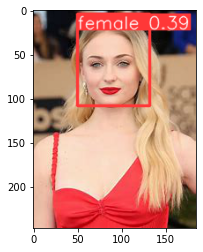

In [52]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
